In [1]:
# Imports
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Produce knn boundary graphs
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns


# labels for pairwise plots
from sklearn.preprocessing._label import LabelEncoder

In [2]:
mpg_weight = 1.0

# use mpg_col_name to rename the columns after adjusting the "mpg scaled" 
# feature
mpg_col_name = "mpg scaled * " + str(mpg_weight)
print("mpg_col_name: '" + mpg_col_name + "'")

mpg_col_name: 'mpg scaled * 1.0'


### Drop attributes or records to fine-tune the KNN model

A KNN model on the full dataset yields a high misclassification rate for certain cars such as the "Tourneo Connect" and the "Fusion" models. The cars with higher misclassification rates will isolated to a separate KNN model to study the behavior related to the high misclassification rates.

The primary dataset to be examined is stored to `df1` and is exported to the "clean1_Ford.csv" file. 

The car models with high misclassification rates are stored in `df2` and exported to the "clean2_Ford.csv" file.

In [3]:
df1 = pd.read_csv("clean_Ford.csv")

df2 = df1[df1.model == ' Grand Tourneo Connect']
df2 = pd.concat([df2, df1[df1.model == ' Tourneo Connect']])
df2 = pd.concat([df2, df1[df1.model == ' Transit Tourneo']])
df2 = pd.concat([df2, df1[df1.model == ' Tourneo Custom']])
df2 = pd.concat([df2, df1[df1.model == ' Fusion']])
df2 = pd.concat([df2, df1[df1.model == ' Ranger']])
df2 = pd.concat([df2, df1[df1.model == ' Streetka']])
df2 = pd.concat([df2, df1[df1.model == ' Escort']])
df2 = pd.concat([df2, df1[df1.model == ' Grand C-MAX']])
df2 = pd.concat([df2, df1[df1.model == ' Mondeo']])
df2 = pd.concat([df2, df1[df1.model == ' S-MAX']])
# df2.to_csv("clean2_Ford.csv", index=False)

df1 = df1[df1.model != ' Grand Tourneo Connect']
df1 = df1[df1.model != ' Tourneo Connect']
df1 = df1[df1.model != ' Transit Tourneo']
df1 = df1[df1.model != ' Tourneo Custom']
df1 = df1[df1.model != ' Fusion']
df1 = df1[df1.model != ' Ranger']
df1 = df1[df1.model != ' Streetka']
df1 = df1[df1.model != ' Escort']
df1 = df1[df1.model != ' Grand C-MAX']
df1 = df1[df1.model != ' Mondeo']
df1 = df1[df1.model != ' S-MAX']
# df1.to_csv("clean1_Ford.csv", index=False)

In [4]:
df = pd.read_csv("clean_Ford.csv")

In [5]:
mpg_weight = 1.0

# use mpg_col_name to rename the columns after adjusting the "mpg scaled" feature
mpg_col_name = "mpg scaled * " + str(mpg_weight)
print("mpg_col_name: '" + mpg_col_name + "'")

mpg_col_name: 'mpg scaled * 1.0'


In [6]:
scaler = MinMaxScaler()
X1 = df.drop("model", axis=1)
scaler.fit(X1)
X1_scaled = scaler.transform(X1)
X1.columns = X1.columns + " scaled"
X1_scaled = pd.DataFrame(X1_scaled, columns=X1.columns)

In [7]:
# adjust the 'mpg scaled' feature
mpg_scaled = X1_scaled["mpg scaled"].to_frame(name=mpg_col_name)*mpg_weight
X1_scaled = pd.concat([X1_scaled.drop("mpg scaled", axis=1), mpg_scaled], axis=1)
display(X1_scaled.head())

,year scaled,price scaled,mileage scaled,engineSize scaled,Automatic scaled,Manual scaled,Semi-Auto scaled,Diesel scaled,Electric scaled,Hybrid scaled,Petrol scaled,mpg scaled * 1.0
0,0.875000,0.211101,0.089747,0.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.203867
1,0.916667,0.247798,0.051125,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.203867
2,0.875000,0.229450,0.070113,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.203867
3,0.958333,0.312018,0.058877,0.3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.107735
4,0.958333,0.293670,0.008337,0.2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.154144


In [8]:
# X1_scaled.to_csv("X1_scaled.csv", index=False)
# df.model.to_csv("y1.csv", index=False)

Scale the secondary dataset

In [9]:
df2 = pd.read_csv("clean2_Ford.csv")

In [10]:
scaler2 = MinMaxScaler()
X2 = df2.drop("model", axis=1)
scaler2.fit(X2)
X2_scaled = scaler2.transform(X2)
X2.columns = X2.columns + " scaled"
X2_scaled = pd.DataFrame(X2_scaled, columns=X2.columns)

In [11]:
mpg_scaled = X2_scaled["mpg scaled"].to_frame(name=mpg_col_name)*mpg_weight
X2_scaled = pd.concat([X2_scaled.drop("mpg scaled", axis=1), mpg_scaled], axis=1)
display(X2_scaled.head())

,year scaled,price scaled,mileage scaled,engineSize scaled,Automatic scaled,Manual scaled,Semi-Auto scaled,Diesel scaled,Electric scaled,Hybrid scaled,Petrol scaled,mpg scaled * 1.0
0,0.958333,0.562972,0.023172,0.125,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.659363
1,0.916667,0.446176,0.062815,0.125,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.563745
2,0.875000,0.388143,0.032153,0.125,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.659363
3,0.958333,0.562972,0.023172,0.125,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.659363
4,0.916667,0.446176,0.062815,0.125,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.563745


In [12]:
# X2_scaled.to_csv("X2_scaled.csv", index=False)
# df2.model.to_csv("y2.csv", index=False)


In [13]:
# read scaled data for non-target attributes
X1_scaled = pd.read_csv("X1_scaled.csv")

# read the target attribute
y1 = pd.read_csv("y1.csv")

Read scaled data from files for the secondary dataset.

In [14]:
X2_scaled = pd.read_csv("X2_scaled.csv")

y2 = pd.read_csv("y2.csv")

### study interactions
Divide data into training and test sets

In [15]:
X1_train_scaled, X1_test_scaled, y1_train, y1_test = train_test_split(
    X1_scaled, y1,
    random_state=0
)
X2_train_scaled, X2_test_scaled, y2_train, y2_test = train_test_split(
    X2_scaled, y2, 
    random_state=0
)

### Plot a 2d knn as an example

##### Select two attributes for the example KNN model

In [16]:
names_2d = [mpg_col_name, "price scaled"]

# primary dataset
X1_2d_train = X1_train_scaled.loc[:, names_2d]
X1_2d_train = X1_2d_train.reset_index(drop=True)
y1_train = np.ravel(y1_train)

# secondary dataset
X2_2d_train = X2_train_scaled.loc[:, names_2d]
X2_2d_train = X2_2d_train.reset_index(drop=True)
y2_train = np.ravel(y2_train)

##### Build the sample model from the training set
- show boundaries for the trained model.
- points from the training set are labeled based on the car models

In [17]:
display(X1_2d_train.shape, y1_train.shape)

(12498, 2)

(12498,)

In [18]:
# choose points in the primary dataset to plot for better visualization
# # define x-axis upper and lower bounds (miles per gallon, scaled)
# X_upper_bound = 0.30
# X_lower_bound = 0.01
X_upper_bound = 0.5
X_lower_bound = -10
# # define points outside of the upper bound and lower bound on x-axis
mask = X1_2d_train[names_2d[0]] > X_upper_bound
mask = mask | (X1_2d_train[names_2d[0]] < X_lower_bound)
# # define the y-axis upper and lower bounds (price, scaled)
# y_upper_bound = 0.60
# y_lower_bound = 0.01
y_upper_bound = 10
y_lower_bound = -10
# # define points outside the upper bound and lower bound on the y-axis
mask = mask | (X1_2d_train[names_2d[1]] > y_upper_bound)
mask = mask | (X1_2d_train[names_2d[1]] < y_lower_bound)
# # index the values to exclude
index = X1_2d_train.loc[mask].index
# # drop the indexed values
X1_2d_train_plottable = X1_2d_train.drop(index=index, axis=1)
# # get the index of the points to include
reverse_index = X1_2d_train.loc[~mask].index.to_numpy()
# # set y_train_plottable (car types) to the included points only
y1_train_plottable = y1_train[reverse_index]
display(y1_train, X1_2d_train)

array([' B-MAX', ' Kuga', ' Fiesta', ..., ' Kuga', ' EcoSport', ' Focus'],
      dtype=object)

,mpg scaled * 1.0,price scaled
0,0.191160,0.144128
1,0.101657,0.321101
2,0.154144,0.232018
3,0.159116,0.330330
4,0.248066,0.152018
...,...,...
12493,0.248066,0.192752
12494,0.248066,0.134037
12495,0.101657,0.299486
12496,0.174033,0.291817


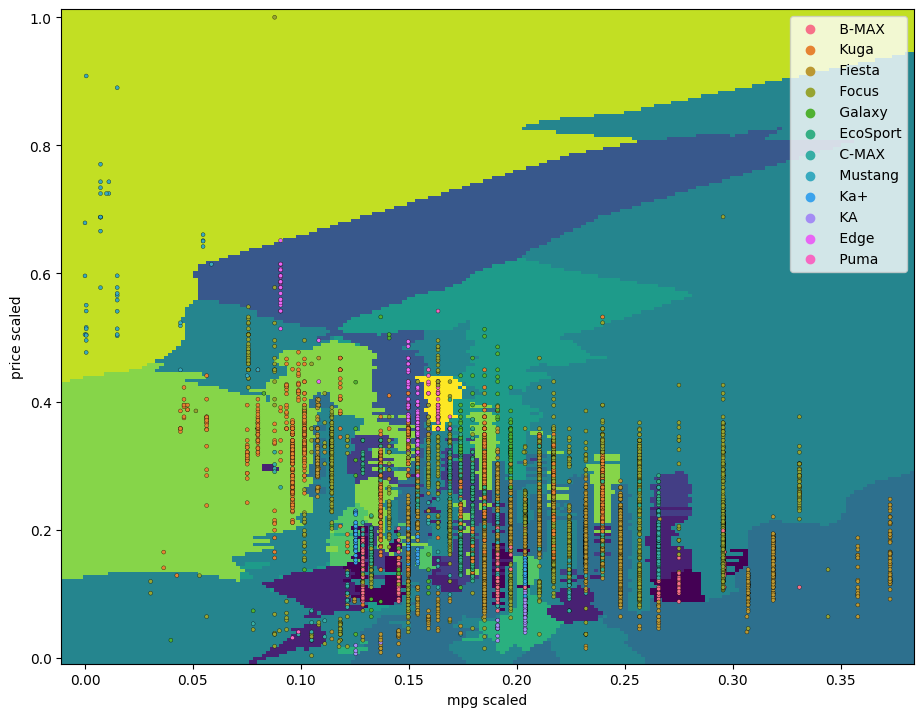

In [19]:
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn.fit(X1_2d_train, y1_train)
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X1_2d_train_plottable,
    grid_resolution=200,
    eps=0.01,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel="mpg scaled",
    ylabel=names_2d[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X1_2d_train_plottable[names_2d[0]],
    y=X1_2d_train_plottable[names_2d[1]],
    hue=y1_train_plottable,
    alpha=1.0,
    edgecolor="black",
    s=8
)

plt.gcf().set_size_inches(11, 8.5)
plt.gcf().align_xlabels()

plt.show()

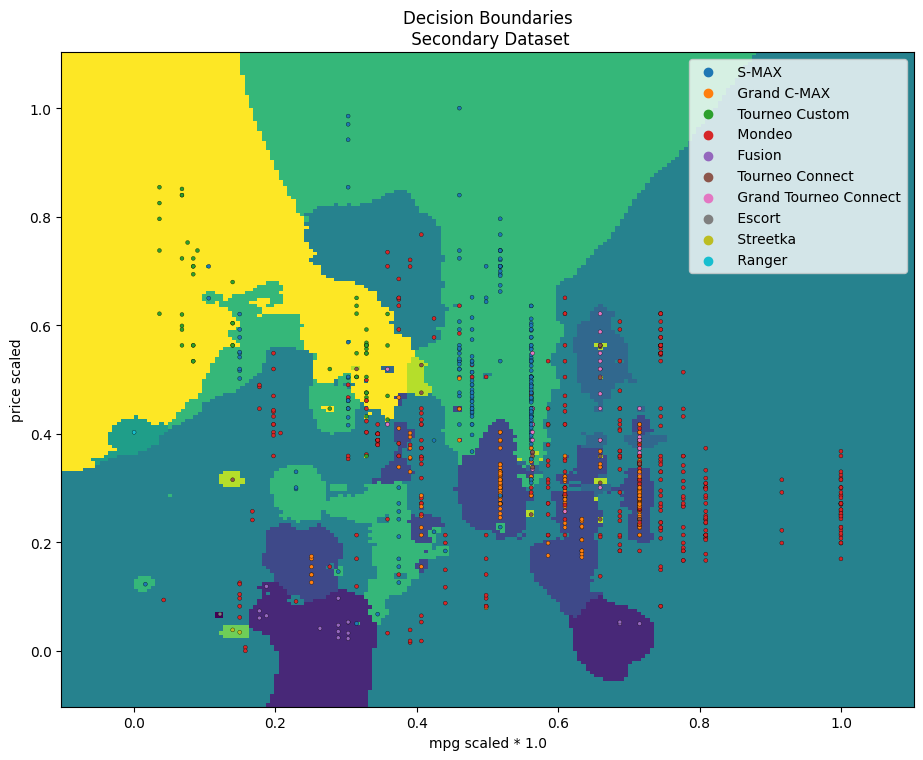

In [20]:
knn = KNeighborsClassifier(n_neighbors=9, weights="distance")
knn.fit(X2_2d_train, y2_train)
_, ax = plt.subplots()

DecisionBoundaryDisplay.from_estimator(
    knn,
    X2_2d_train,
    grid_resolution=200,
    eps=0.1,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel=names_2d[0],
    ylabel=names_2d[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=X2_2d_train[names_2d[0]],
    y=X2_2d_train[names_2d[1]],
    hue=y2_train,
    alpha=1.0,
    edgecolor="black",
    s=8,
)

plt.gcf().set_size_inches(11, 8.5)
plt.gcf().align_xlabels()
plt.title("Decision Boundaries\n Secondary Dataset")

plt.show()

### Assess accuracy for the sample KNN model

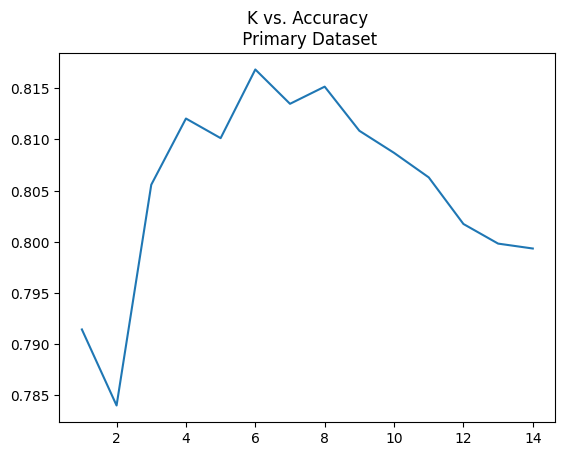

In [21]:
X1_2d_test = X1_test_scaled.loc[:,[names_2d[0],names_2d[1]]]

arr = np.array([])
y1_test = y1_test.squeeze()
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X1_2d_train, y1_train)
    y1_predict = knn.predict(X1_2d_test)
    m = np.mean(y1_predict == y1_test)
    arr = np.append(arr, np.array(m))
plt.plot(range(1, arr.size+1), arr)
plt.title("K vs. Accuracy\n Primary Dataset")
plt.show()

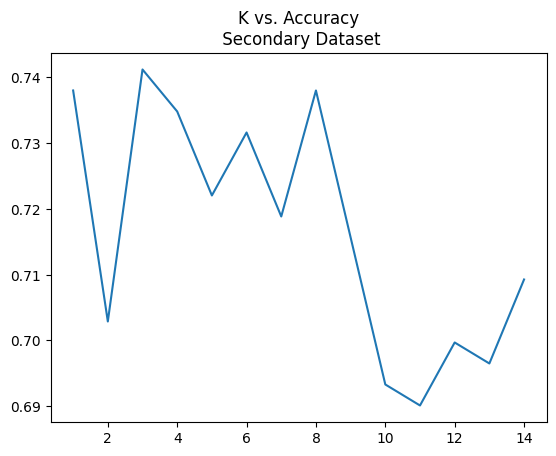

In [22]:
X2_2d_test = X2_test_scaled.loc[:,[names_2d[0],names_2d[1]]]

arr = np.array([])
y2_test = y2_test.squeeze()
for n in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X2_2d_train, y2_train)
    y2_predict = knn.predict(X2_2d_test)
    m = np.mean(y2_predict == y2_test)
    arr = np.append(arr, np.array(m))
plt.plot(range(1, arr.size+1), arr)
plt.title("K vs. Accuracy\n Secondary Dataset")
plt.show()

In [23]:
# Note: the 2-dimensional feature vector is still being used here
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X1_2d_train, y1_train)
y1_predict = knn.predict(X1_2d_test)
m = np.mean(y1_predict == y1_test)
arr = np.append(arr, np.array(m))
display(knn.score(X1_2d_test, y1_test))

misclassified_y1 = y1_test[y1_test != y1_predict]

0.815170427268363

In [24]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X2_2d_train, y2_train)
y2_predict = knn.predict(X2_2d_test)
m = np.mean(y2_predict == y2_test)
arr = np.append(arr, np.array(m))
display(knn.score(X2_2d_test, y2_test))

misclassified_y2 = y2_test[y2_test != y2_predict]

display(misclassified_y2)

0.731629392971246

18       Grand Tourneo Connect
875                     Mondeo
45       Grand Tourneo Connect
5        Grand Tourneo Connect
328                Grand C-MAX
                 ...          
747                     Mondeo
1146                     S-MAX
828                     Mondeo
271                Grand C-MAX
893                     Mondeo
Name: model, Length: 84, dtype: object

array([' Focus', ' B-MAX', ' Ka+', ' KA', ' Kuga', ' C-MAX', ' EcoSport',
       ' Fiesta', ' Edge', ' Galaxy', ' Puma', ' Mustang'], dtype=object)

(770,)

770

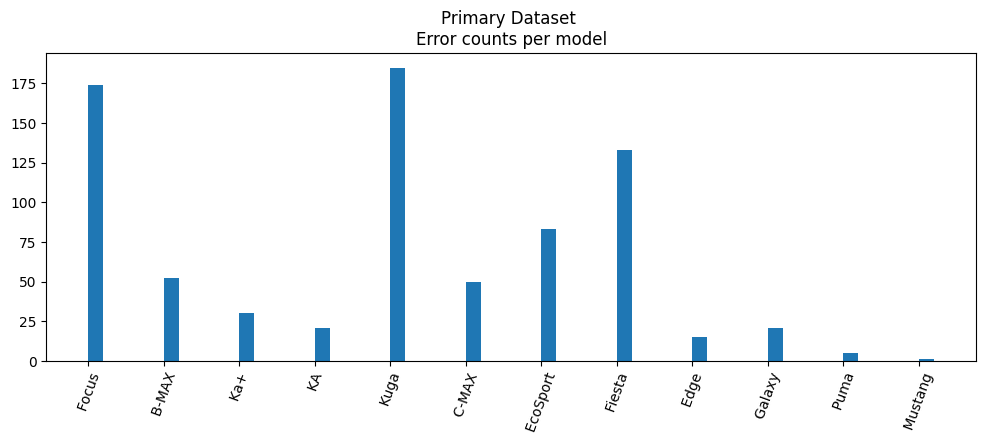

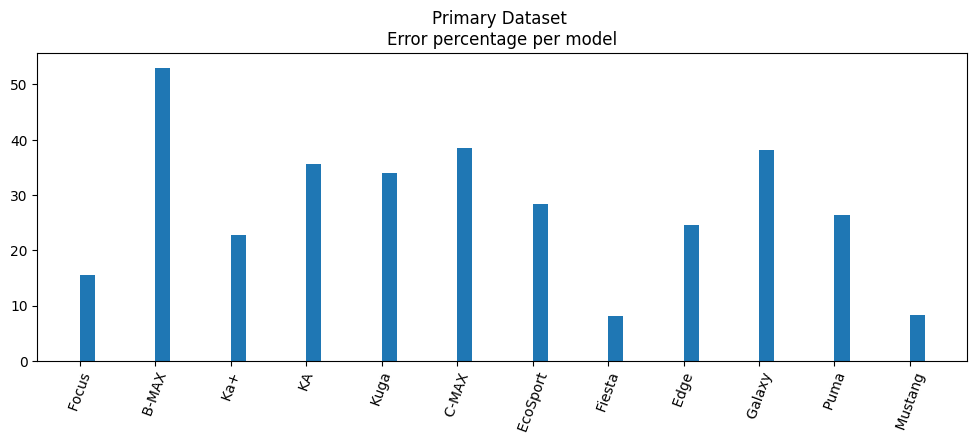

In [25]:
names = misclassified_y1.unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified_y1[misclassified_y1 == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y1_test[y1_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified_y1.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Primary Dataset \nError counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Primary Dataset \nError percentage per model")
plt.show()

array([' Grand Tourneo Connect', ' Mondeo', ' Grand C-MAX', ' S-MAX',
       ' Tourneo Connect', ' Transit Tourneo', ' Tourneo Custom'],
      dtype=object)

(84,)

84

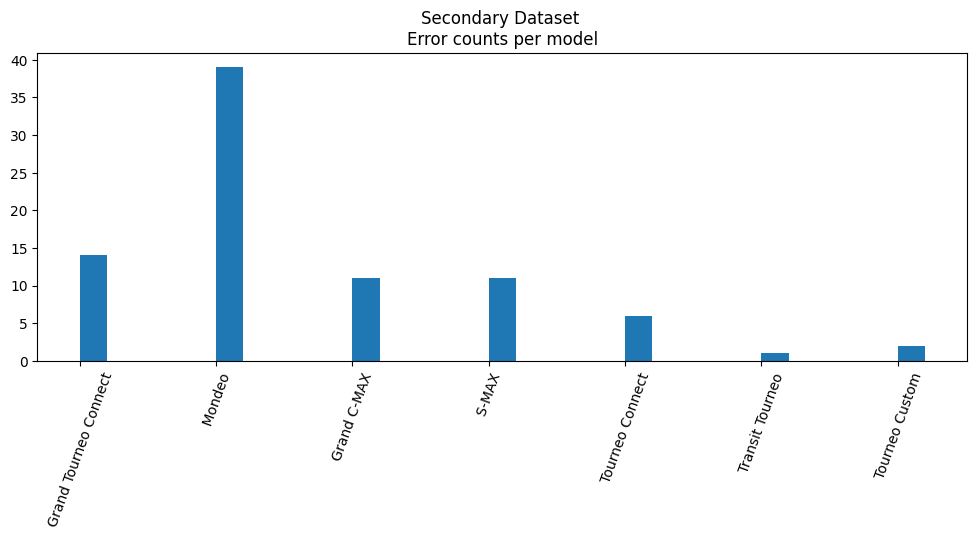

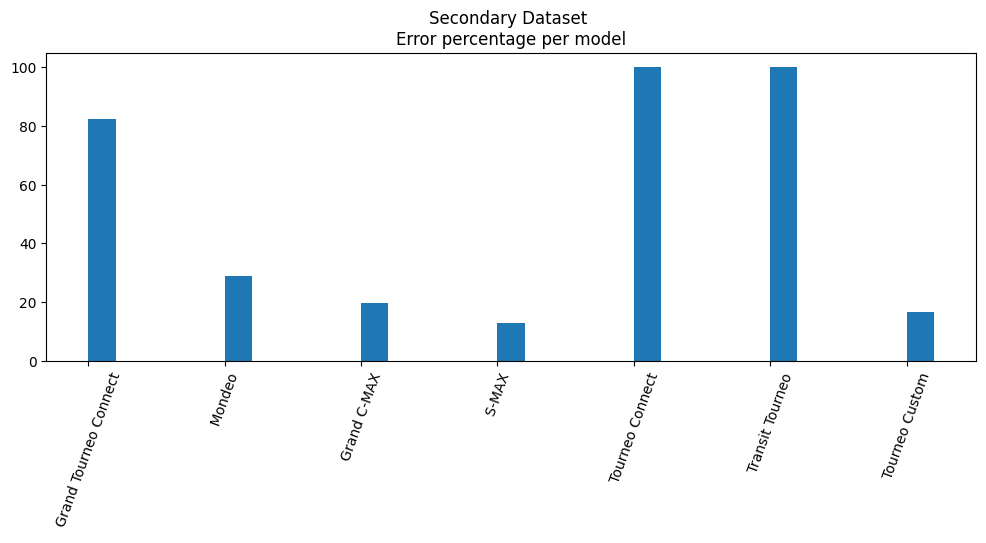

In [26]:
names = misclassified_y2.unique()
sum = 0
error_counts = np.array([])
name_counts = np.array([])
for name in names:
    errors = misclassified_y2[misclassified_y2 == name].shape[0]
    sum += errors
    error_counts = np.append(error_counts, np.array(errors))
    name_total = y2_test[y2_test == name].shape[0]
    name_counts = np.append(name_counts, np.array(name_total))
display(names, misclassified_y2.shape, sum)

error_percentage = 100 * error_counts / name_counts



# Plot misclassifications
plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_counts, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Secondary Dataset \nError counts per model")
plt.show()

plt.figure(figsize=(12, 4))
plt.bar(range(error_counts.size), height=error_percentage, align='edge', width=0.2)
plt.xticks(range(error_counts.size), names, rotation=70)
plt.title("Secondary Dataset \nError percentage per model")
plt.show()